In [33]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


df = pd.read_csv ('predict_admission.csv')
i = df.iloc [:,1:8]
d = df.iloc [:,8]

df.info()
#print(i)
#print(d)
df


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [9]:
from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split (i, d, test_size = .20)

#print("records in x_test")
#print(x_test)  # 8 records in x_test
#print(y_test) 
#print(x_train)
#print(y_train)


#print("output of x_train before reshape is :")
#print(x_train)
#x_train = x_train.reshape(-1,1)
#print(x_train)

#y_train = y_train.reshape(-1,1)


#print("output of x_train after reshape is :")
#print(x_train)

In [10]:
#print("again reshaping")
#x_train = x_train.reshape(1,-1)
#print(x_train)
#x_test = x_test.reshape(-1,1)

from sklearn.linear_model import LinearRegression
lnr = LinearRegression()
lnr.fit (x_train, y_train ) 

predicted_y = lnr.predict(x_test)
print("predicted y records:")
print(predicted_y)
print(y_test)
print(x_test)

predicted y records:
[0.52890626 0.61588055 0.72466186 0.94154461 0.65825213 0.70964204
 0.72934171 0.51276281 0.94454692 0.7952012  0.7751116  0.59899863
 0.90766961 0.73672624 0.60642494 0.95377228 0.62988133 0.62571035
 0.50531948 0.84108571 0.59202382 0.78420387 0.6033668  0.65005797
 0.95186297 0.67090683 0.50783773 0.76992945 0.87172535 0.71680775
 0.86208557 0.64633295 0.57461934 0.54274225 0.74903056 0.75248911
 0.82358841 0.64123933 0.62147378 0.65089443 0.62140745 0.80505434
 0.72537141 0.73953311 0.81432572 0.57052561 0.74118924 0.62036824
 0.8945443  0.6361485  0.79359392 0.85388145 0.6611049  0.82156602
 0.50983337 0.69367477 0.76488443 0.9983142  0.7418464  0.66920419
 0.7757914  0.78598115 0.57350438 0.68735977 0.84981867 0.86267885
 0.73820608 0.56748284 0.63395408 0.88578897 0.60836833 0.87186463
 0.78197915 0.68057093 0.95017128 0.64311896 0.5415482  0.96510246
 0.55090456 0.73075998 0.86673698 0.61667876 0.74995193 0.53573919
 0.81772151 0.59220926 0.49449634 0.64944

In [11]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from math import sqrt
print("RMSE is:-")

print('Mean Absolute Error(MAE):', metrics.mean_absolute_error(y_test, predicted_y))
print('Mean Squared Error(MSE):', metrics.mean_squared_error(y_test, predicted_y))
print('Root Mean Squared Error(RMSE):', np.sqrt(metrics.mean_squared_error(y_test, predicted_y)))

RMSE is:-
Mean Absolute Error(MAE): 0.04819521718233701
Mean Squared Error(MSE): 0.004704626245057279
Root Mean Squared Error(RMSE): 0.06859027806516955


In [22]:
df['Chance of Admit']

KeyError: 'Chance of Admit'

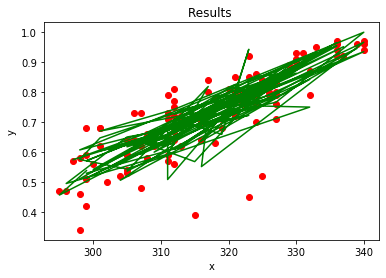

In [27]:
#plt.scatter(y_test,predicted_y, color = 'red')
plt.scatter(x_test['GRE Score'],y_test, color = 'red')

plt.plot(x_test['GRE Score'],predicted_y, color = 'green')
plt.title ('Results ')
plt.xlabel('x')
plt.ylabel('y')
plt.show()